In [1]:
from mapf import *
from rcbs import *
from matplotlib import pyplot as plt
import numpy as np

(64, 64)
61.96773353931867


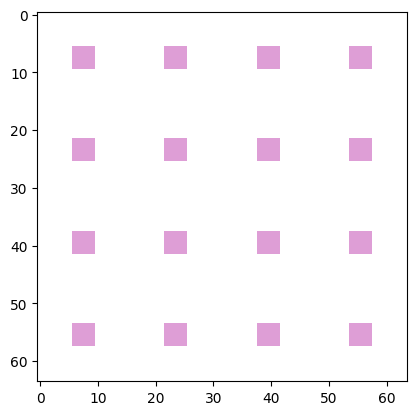

In [11]:
nrows = 4
ncols = 4
env = ColumnLatticeEnvironment(nrows, ncols, 4, 4, 6, 6, 1, 1)
size = env.gridworld.size
print(size)
print(np.sqrt(size[0]*size[1]-len(env.gridworld.obstacles)))
fig, ax = plt.subplots()
draw_environment(ax,env,{},{})

In [ ]:
N_agents = int(2*np.sqrt(size[0]*size[1]-len(env.gridworld.obstacles)))
# N_agents = 150
print(N_agents)
x, final_goals, region_paths = random_problem(N_agents, env, path_cutoff = (nrows+ncols))

150


In [13]:
omega = 1
root = init_rcbs(env, x, final_goals, region_paths)
solution, node, O = regional_cbs(root, env, omega, verbose = True, maxtime = 120.)

Branching at region (1, 2) with constraint t = 14, p1 = (31, 42), p2 = (32, 42) applied to agent 117
Branching at region (2, 2) with constraint t = 14, p1 = (33, 42), p2 = (32, 42) applied to agent 114
# of completed trips 0
advancing agents...
Branching at region (1, 2) with constraint t = 8, p1 = (16, 47), p2 = (15, 47) applied to agent 60
Branching at region (0, 2) with constraint t = 8, p1 = (15, 47), p2 = (16, 47) applied to agent 24
Branching at region (1, 2) with constraint t = 8, p1 = (16, 47), p2 = (15, 47) applied to agent 60
Branching at region (0, 2) with constraint t = 8, p1 = (15, 47), p2 = (15, 47) applied to agent 24
Branching at region (1, 2) with constraint t = 8, p1 = (16, 47), p2 = (15, 47) applied to agent 60
Branching at region (0, 2) with constraint t = 8, p1 = (14, 47), p2 = (15, 47) applied to agent 24
Branching at region (2, 1) with constraint t = 20, p1 = (47, 30), p2 = (47, 31) applied to agent 92
Branching at region (3, 1) with constraint t = 20, p1 = (48, 

KeyboardInterrupt: 

In [5]:

def verify_solution(solution: MAPFSolution) -> bool:

    if solution is None:
        return False
    
    paths = solution.paths
    agents = list(paths.keys())
    violations = [] 
    for i in range(len(agents)):
        for j in range(i + 1, len(agents)):
            path1 = paths[agents[i]].vertexes
            path2 = paths[agents[j]].vertexes
            
           
            for t in range(min(len(path1), len(path2))):
             
                if path1[t].pos == path2[t].pos:
                    if t < min(len(path1)-1,len(path2)-1):
                        print(f"Vertex collision between agents {agents[i]} and {agents[j]}")
                        print(f"Time: {t}")
                        print(f"Position: {path1[t].pos}")
                        violations.append({'type':'vertex','agents':(agents[i],agents[j]),'pos': path1[t].pos, 'time': t})
                
                if t < min(len(path1)-1, len(path2)-1):
                    if (path1[t].pos == path2[t+1].pos and 
                        path1[t+1].pos == path2[t].pos):
                        print(f"Edge collision between agents {agents[i]} and {agents[j]}")
                        print(f"Time: {t}-{t+1}")
                        violations.append({'type':'edge','agents':(agents[i],agents[j]),'edge': (path1[t].pos,path2[t].pos), 'time': t})
    
    return violations

if solution:
        print("\nVerifying RCBS solution...")
        violations = verify_solution(solution)
        if len(violations) > 0:
            print(len(violations))
            print(violations)

for id, path in solution.paths.items():
    print({id:str(path)})
# MAPFAnimation(env, solution).animate().save('foo.gif')


Verifying RCBS solution...
{0: '(t = 0, p = (54, 11)), (t = 1, p = (53, 11)), (t = 2, p = (52, 11)), (t = 3, p = (51, 11)), (t = 4, p = (50, 11)), (t = 5, p = (49, 11)), (t = 6, p = (48, 11)), (t = 7, p = (47, 11)), (t = 8, p = (47, 12)), (t = 9, p = (46, 12)), (t = 10, p = (46, 13)), (t = 11, p = (46, 14)), (t = 12, p = (46, 15)), (t = 13, p = (46, 16)), (t = 14, p = (46, 17)), (t = 15, p = (46, 18)), (t = 16, p = (46, 19)), (t = 17, p = (45, 19)), (t = 18, p = (45, 20)), (t = 19, p = (45, 21)), (t = 20, p = (44, 21)), (t = 21, p = (43, 21)), (t = 22, p = (42, 21)), (t = 23, p = (41, 21)), (t = 24, p = (41, 22)), (t = 25, p = (40, 22)), (t = 26, p = (39, 22)), (t = 27, p = (39, 23)), (t = 28, p = (39, 24)), (t = 29, p = (39, 25)), (t = 30, p = (38, 25)), (t = 31, p = (38, 26)), (t = 32, p = (38, 27)), (t = 33, p = (38, 28)), (t = 34, p = (37, 28)), (t = 35, p = (36, 28))'}
{1: '(t = 0, p = (60, 26)), (t = 1, p = (59, 26)), (t = 2, p = (58, 26)), (t = 3, p = (57, 26)), (t = 4, p = (56

116


MovieWriter ffmpeg unavailable; using Pillow instead.


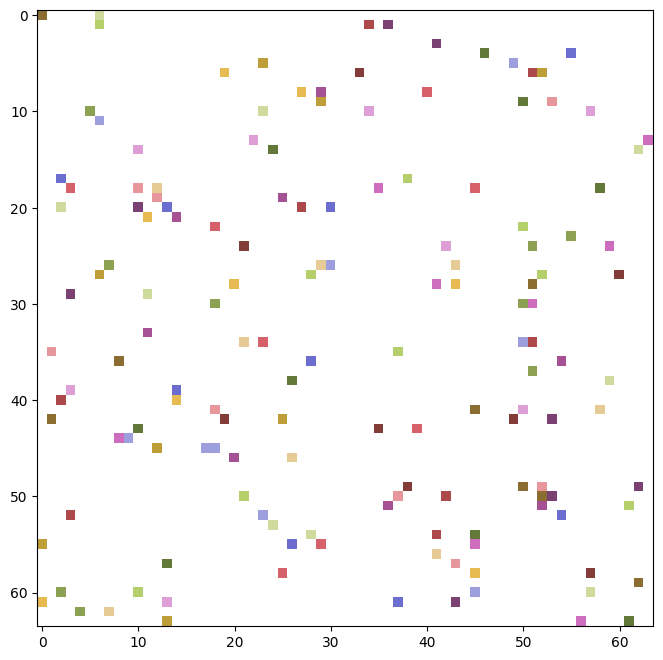

In [6]:
MAPFAnimation(env, solution).animate().save('foo.gif')